Andrea Hanel 2024

# Fig. S 5E

- creating pseudobulk profiles (aggregating counts per cluster) using Decoupler
- finding marker genes per cluster with EdgeR (pseudobulk level) folling their UsersGuide example

In [1]:
import decoupler as dc
import scanpy as sc

!echo "Conda Environment: $CONDA_DEFAULT_ENV"
from datetime import datetime
print(f"Date: {datetime.now():%Y-%m-%d}")

Conda Environment: tired_like_a_kitten
Date: 2024-11-27


In [2]:
adata = sc.read_h5ad ("/research/groups/sysgen/PROJECTS/sysgen_team/andrea_work/2023_Fischer_iPSC/revision_final/data/adata2_PCAharmony_leiden_LS.h5ad")


In [3]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

-----
anndata     0.10.7
scanpy      1.10.1
-----
PIL                         10.3.0
anyio                       NA
argcomplete                 NA
arrow                       1.3.0
asttokens                   NA
attr                        24.2.0
attrs                       24.2.0
babel                       2.16.0
brotli                      1.1.0
certifi                     2024.08.30
cffi                        1.16.0
charset_normalizer          3.3.2
colorama                    0.4.6
comm                        0.2.2
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.9.0.post0
debugpy                     1.8.5
decorator                   5.1.1
decoupler                   1.7.0
defusedxml                  0.7.1
exceptiongroup              1.2.2
executing                   2.1.0
fastjsonschema              NA
fqdn                        NA
gmpy2                       2.1.5
google                      NA
h5py                        3.11.0
i

In [4]:
adata.X = adata.layers["raw_counts"]

In [5]:
pdata = dc.get_pseudobulk(
        adata,
        sample_col='sample',
        groups_col='leiden_res0_25',
        mode='sum',
        min_cells=0,
        min_counts=0,
        skip_checks=True  # True - Allow raw counts with decimals
    )

In [6]:
pdata.write ("/research/groups/sysgen/PROJECTS/sysgen_team/andrea_work/2023_Fischer_iPSC/revision_final/data/adata2_leiden_FS_pbulk.h5ad")


In [1]:
library(tidyverse)
library(data.table)
library(matrixStats)
library(ggplot2)
library(anndata)
library(edgeR)
library(scales)
library(knitr)

#to be able to adjust figs
fig <- function(width, heigth){
options(repr.plot.width = width, repr.plot.height = heigth) }

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘anndata’


The foll

In [2]:
ad = read_h5ad("/research/groups/sysgen/PROJECTS/sysgen_team/andrea_work/2023_Fischer_iPSC/revision_final/data/adata2_leiden_FS_pbulk.h5ad")


In [3]:
x = t(ad$X)
head(x, n=2)

,ChiPSC12_ETV6_RUNX1_KI_0,ChiPSC12_WT_0,HW8_ETV6_RUNX1_KI_0,HW8_WT_0,ChiPSC12_ETV6_RUNX1_KI_1,ChiPSC12_WT_1,HW8_ETV6_RUNX1_KI_1,HW8_WT_1,ChiPSC12_ETV6_RUNX1_KI_2,ChiPSC12_WT_2,⋯,HW8_ETV6_RUNX1_KI_3,HW8_WT_3,ChiPSC12_ETV6_RUNX1_KI_4,ChiPSC12_WT_4,HW8_ETV6_RUNX1_KI_4,HW8_WT_4,ChiPSC12_ETV6_RUNX1_KI_5,ChiPSC12_WT_5,HW8_ETV6_RUNX1_KI_5,HW8_WT_5
A1BG,2993,1477,1863,1929,262,1041,326,884,836,243,⋯,1321,455,712,45,648,33,171,45,235,30
A1BG-AS1,482,216,237,244,58,264,57,206,132,28,⋯,167,76,154,5,97,7,39,4,22,11


In [4]:
head(ad$obs)

,sample,etv6_runx1,celline,leiden_res0_25,psbulk_n_cells,psbulk_counts
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
ChiPSC12_ETV6_RUNX1_KI_0,ChiPSC12_ETV6_RUNX1_KI,KI,ChiPSC12,0,4319,99488072
ChiPSC12_WT_0,ChiPSC12_WT,WT,ChiPSC12,0,1802,42658232
HW8_ETV6_RUNX1_KI_0,HW8_ETV6_RUNX1_KI,KI,HW8,0,3040,67216960
HW8_WT_0,HW8_WT,WT,HW8,0,2273,57123564
ChiPSC12_ETV6_RUNX1_KI_1,ChiPSC12_ETV6_RUNX1_KI,KI,ChiPSC12,1,722,19389934
ChiPSC12_WT_1,ChiPSC12_WT,WT,ChiPSC12,1,3511,101122712


In [5]:
sampleinfo = ad$obs %>%
rename(sampletype = sample)%>%
rownames_to_column("sample") 

head(sampleinfo, n=3)

,sample,sampletype,etv6_runx1,celline,leiden_res0_25,psbulk_n_cells,psbulk_counts
,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
1,ChiPSC12_ETV6_RUNX1_KI_0,ChiPSC12_ETV6_RUNX1_KI,KI,ChiPSC12,0,4319,99488072
2,ChiPSC12_WT_0,ChiPSC12_WT,WT,ChiPSC12,0,1802,42658232
3,HW8_ETV6_RUNX1_KI_0,HW8_ETV6_RUNX1_KI,KI,HW8,0,3040,67216960


In [6]:
table(colnames(x)==sampleinfo$sample)


TRUE 
  24 

In [7]:
y <- DGEList (counts =x, 
              group = sampleinfo$leiden_res0_25,
              genes = rownames (x))

In [8]:
summary(y$samples$lib.size)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  1115738  10384676  22331234  33104324  51316143 101122663 

In [9]:
keep.samples <- y$samples$lib.size > 5e4
table(keep.samples)

keep.samples
TRUE 
  24 

In [10]:
keep.genes <- filterByExpr(y, group=y$samples$leiden_res0_25)
table(keep.genes)

keep.genes
FALSE  TRUE 
13230 19908 

In [11]:
y <- y[keep.genes, , keep=FALSE]

In [12]:
y <- normLibSizes(y)
head(y$samples, n=10L)

,group,lib.size,norm.factors
,<fct>,<dbl>,<dbl>
ChiPSC12_ETV6_RUNX1_KI_0,0,99418363,0.8416191
ChiPSC12_WT_0,0,42630523,0.7969157
HW8_ETV6_RUNX1_KI_0,0,67174525,0.8308650
HW8_WT_0,0,57087289,0.8545873
ChiPSC12_ETV6_RUNX1_KI_1,1,19377269,1.1302345
ChiPSC12_WT_1,1,101059458,1.0896259
HW8_ETV6_RUNX1_KI_1,1,23639259,1.1330990
HW8_WT_1,1,88874507,1.0970719
ChiPSC12_ETV6_RUNX1_KI_2,2,33679128,0.7874314


In [13]:
min(y$samples$norm.factors)

[1] 0.6490274

In [14]:
max(y$samples$norm.factors)

[1] 1.195239

In [15]:
y$samples %>%
as.data.frame () %>%
arrange((norm.factors))%>%
head()

,group,lib.size,norm.factors
,<fct>,<dbl>,<dbl>
ChiPSC12_WT_2,2,9125309,0.6490274
HW8_WT_2,2,12342963,0.7015375
HW8_ETV6_RUNX1_KI_2,2,20990095,0.7094991
ChiPSC12_ETV6_RUNX1_KI_2,2,33679128,0.7874314
ChiPSC12_WT_0,0,42630523,0.7969157
HW8_ETV6_RUNX1_KI_0,0,67174525,0.8308650


In [16]:
cpm <- cpm(y, normalized.lib.sizes=TRUE)
logcpm <- cpm(y, log=TRUE,normalized.lib.sizes=TRUE)
head (logcpm)

,ChiPSC12_ETV6_RUNX1_KI_0,ChiPSC12_WT_0,HW8_ETV6_RUNX1_KI_0,HW8_WT_0,ChiPSC12_ETV6_RUNX1_KI_1,ChiPSC12_WT_1,HW8_ETV6_RUNX1_KI_1,HW8_WT_1,ChiPSC12_ETV6_RUNX1_KI_2,ChiPSC12_WT_2,⋯,HW8_ETV6_RUNX1_KI_3,HW8_WT_3,ChiPSC12_ETV6_RUNX1_KI_4,ChiPSC12_WT_4,HW8_ETV6_RUNX1_KI_4,HW8_WT_4,ChiPSC12_ETV6_RUNX1_KI_5,ChiPSC12_WT_5,HW8_ETV6_RUNX1_KI_5,HW8_WT_5
A1BG,5.1631608,5.4441677,5.0635239,5.3074693,3.5878628,3.2501625,3.6125714,3.1902441,4.9811457,5.3607360,⋯,4.3406565,4.9215858,4.344328,4.4942550,4.4829437,4.6336722,4.1506854,4.579402,4.2841786,4.4703869
A1BG-AS1,2.5414429,2.6823822,2.1068418,2.3398715,1.4379979,1.2978359,1.1303744,1.1203063,2.3330008,2.2596703,⋯,1.3867238,2.3542338,2.151032,1.3553093,1.7652441,2.4097725,2.0349487,1.124884,0.9102784,3.0297855
A2M,0.9980298,1.0238275,0.7430209,0.2491652,0.3199835,-0.6591142,-0.4478186,-0.4788549,0.1595710,1.5516492,⋯,4.1249628,4.0192128,1.808516,-4.0315432,1.6903030,1.9309710,1.9212642,3.001801,4.1155840,4.2081482
A2M-AS1,2.2896878,1.6289943,2.5257554,1.8913143,2.0759556,1.3604053,2.0199966,1.0505846,1.4533186,0.3139033,⋯,0.9688679,0.9919815,3.019821,1.8308508,3.0506960,3.1804462,1.5653336,1.124884,1.4795089,1.1838378
A2ML1,-1.7947356,-1.1719995,-1.2532986,-1.7031249,-2.7134128,-1.9382332,-2.0126610,-2.2176468,0.5423288,1.7815934,⋯,-1.1731963,-1.9402435,-1.122309,-0.8348982,-0.7924577,0.6433354,-0.7891028,-4.031543,-0.6445653,0.6181617
A2ML1-AS1,1.4657961,0.8224361,0.8615684,0.7836311,1.5769612,1.6253660,1.0017937,1.3582094,2.9264975,3.1164089,⋯,0.9230638,0.8921698,2.160242,1.0419756,1.5783814,1.6148152,1.3479008,1.124884,0.7774612,0.6181617


In [17]:
m = as.matrix(logcpm)
o <- order(rowVars(m), decreasing = TRUE)
cpm_ordered <- m[o,]

vargenes = rownames(cpm_ordered[1:1000,])

cpm_ordered = cpm_ordered[vargenes,]

cpm_ordered_t = t(cpm_ordered)

pca <- prcomp((cpm_ordered_t), scale. = TRUE)
pca_df <- data.frame(pca$x[, 1], pca$x[, 2])

In [18]:
# Extract variance explained by PC1 and PC2
variance_pc1 <- round(summary(pca)$importance["Proportion of Variance", "PC1"] * 100, 2)
variance_pc2 <- round(summary(pca)$importance["Proportion of Variance", "PC2"] * 100, 2)


In [19]:
colors_clu <- c(
  "0" = "#FF9E40", # softer orange
  "1" = "#B00326", # darker red
  "2" = "#B59A88", # warm beige
  "3" = "#6325AF", # darker violet
  "4" = "#367DF7", # light red
  "5" = "#AB8CBA"  # lighter violet
)


In [20]:
head(sampleinfo, n=2)

,sample,sampletype,etv6_runx1,celline,leiden_res0_25,psbulk_n_cells,psbulk_counts
,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
1,ChiPSC12_ETV6_RUNX1_KI_0,ChiPSC12_ETV6_RUNX1_KI,KI,ChiPSC12,0,4319,99488072
2,ChiPSC12_WT_0,ChiPSC12_WT,WT,ChiPSC12,0,1802,42658232


In [21]:
pca_gg = ggplot(pca_df, 
             aes(x = pca.x...1., 
                 y = pca.x...2.,
                 color = sampleinfo$leiden_res0_25,
                 shape = sampleinfo$etv6_runx1)) +  # Map shapes to etv6_runx1
  geom_point(size = 5, alpha = 1) +
  xlab(paste0("PC1 (", variance_pc1, "%)")) +
  ylab(paste0("PC2 (", variance_pc2, "%)")) +
  scale_color_manual(values = colors_clu) + 
  scale_shape_manual(values = c("WT" = 17, "KI" = 16)) +  # Set shapes (17 = triangle, 16 = circle)
  theme_classic(base_size = 21, base_family = "sans") +  
  theme(aspect.ratio = 1, 
        axis.text = element_text(size = 22), 
        axis.title = element_text(size = 21)) +
  labs(
    colour = "Cell type",
    shape = "Modification"  # Add legend for shapes
  ) +
  guides(color = guide_legend(title = "Cell type", 
                              override.aes = list(size = 2.7, alpha = 1))) +
  theme(axis.title.x = element_text(vjust = -1)) +
  theme(
    plot.title = element_text(hjust = 0.5, size = 22, vjust = 0, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5, size = 21, vjust = 0),
    legend.title = element_text(color = "black", size = 20, face = "bold"),
    legend.text = element_text(color = "black", size = 20),
    axis.line.x = element_line(size = 1),
    axis.line.y = element_line(size = 1)) + 
  guides(colour = guide_legend(ncol = 2)) +
  ggtitle("500 HVGs")


Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


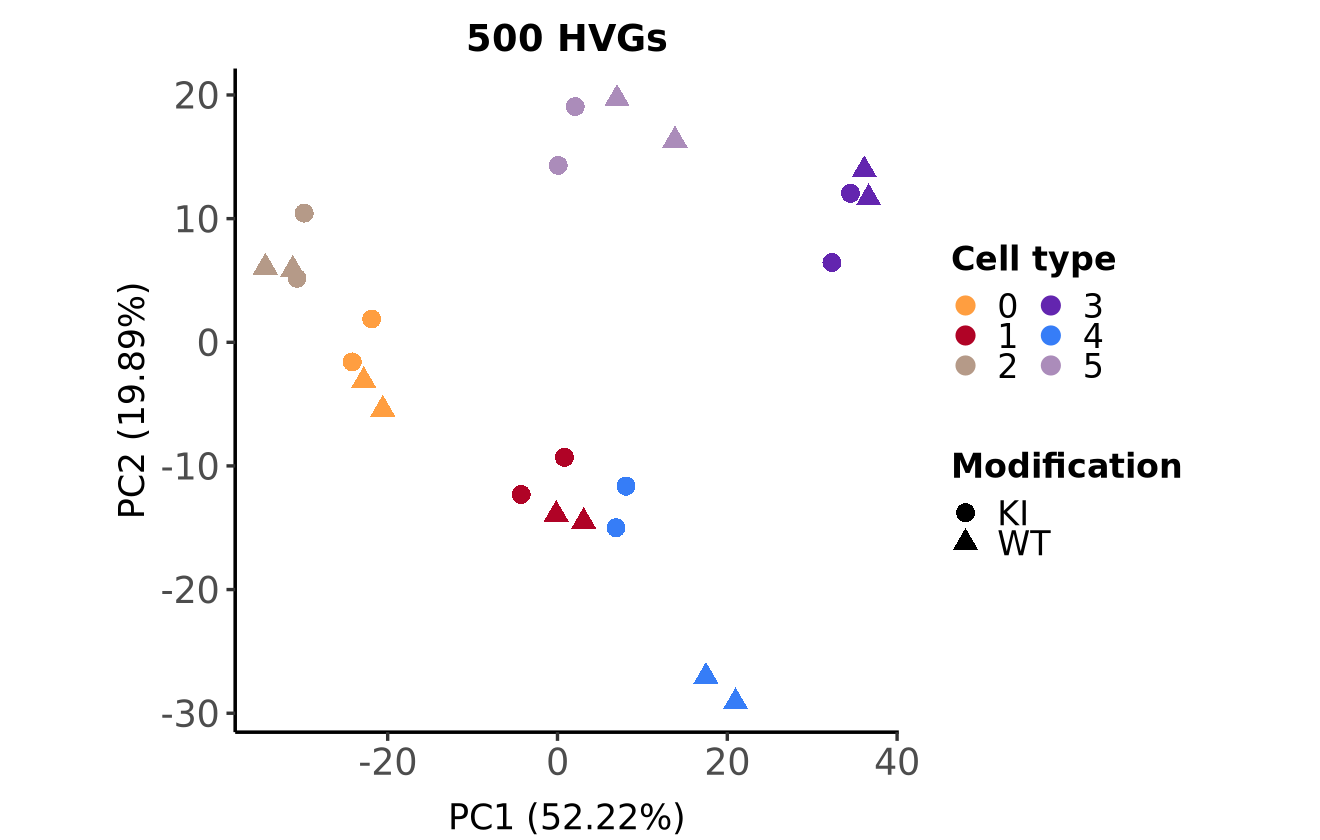

In [22]:
fig (11,7)
pca_gg

In [23]:
sampleinfo$leiden_res0_25 = factor (sampleinfo$leiden_res0_25)

## Design

In [24]:
head(y$samples)

,group,lib.size,norm.factors
,<fct>,<dbl>,<dbl>
ChiPSC12_ETV6_RUNX1_KI_0,0,99418363,0.8416191
ChiPSC12_WT_0,0,42630523,0.7969157
HW8_ETV6_RUNX1_KI_0,0,67174525,0.8308650
HW8_WT_0,0,57087289,0.8545873
ChiPSC12_ETV6_RUNX1_KI_1,1,19377269,1.1302345
ChiPSC12_WT_1,1,101059458,1.0896259


In [25]:
head(sampleinfo, n=2)

,sample,sampletype,etv6_runx1,celline,leiden_res0_25,psbulk_n_cells,psbulk_counts
,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
1,ChiPSC12_ETV6_RUNX1_KI_0,ChiPSC12_ETV6_RUNX1_KI,KI,ChiPSC12,0,4319,99488072
2,ChiPSC12_WT_0,ChiPSC12_WT,WT,ChiPSC12,0,1802,42658232


In [26]:
celline <- factor(sampleinfo$celline)
modif = factor(sampleinfo$etv6_runx1)
cluster <- factor (sampleinfo$leiden_res0_25)

In [27]:
design <- model.matrix(~ cluster + celline + modif)

In [28]:
colnames(design) <- gsub("sample", "", colnames(design))

In [29]:
colnames(design)[1] <- "Int"

In [30]:
head(design)

,Int,cluster1,cluster2,cluster3,cluster4,cluster5,cellineHW8,modifWT
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,1
5,1,1,0,0,0,0,0,0
6,1,1,0,0,0,0,0,1


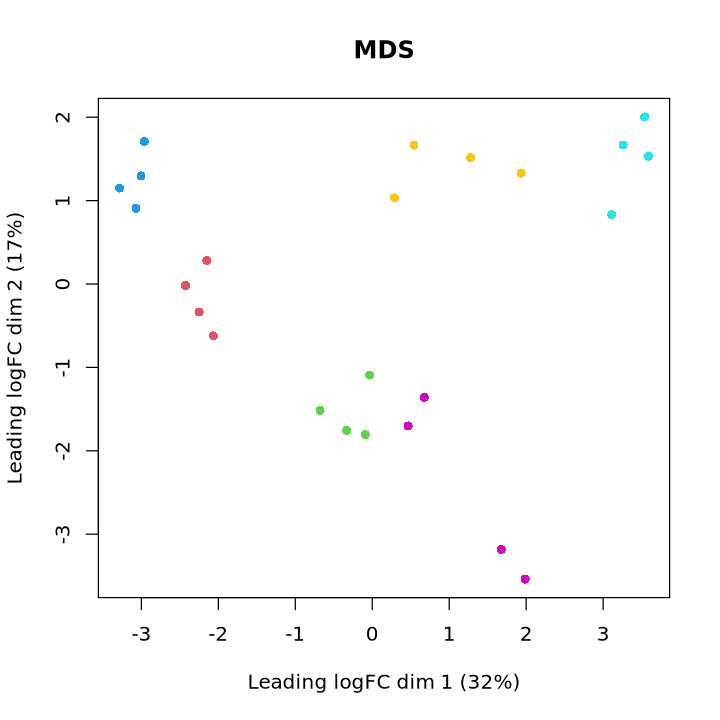

In [31]:
fig(6,6)
plotMDS(y, pch=16, col=c(2:9)[cluster], main="MDS")

In [32]:
y <- estimateDisp(y, design, robust=TRUE)
y$common.dispersion

[1] 0.04934834

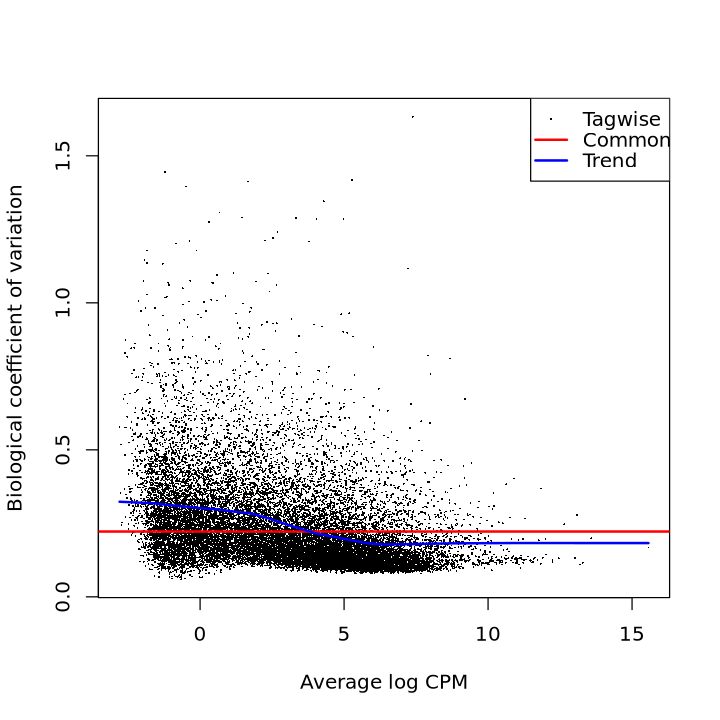

In [33]:
plotBCV(y)

In [34]:
fit <- glmQLFit(y, design, robust=TRUE)

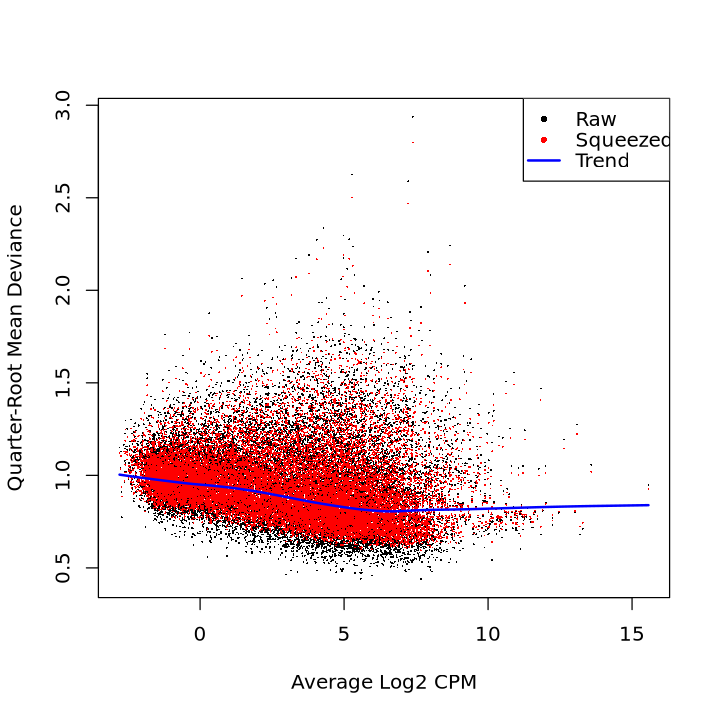

In [35]:
plotQLDisp(fit)

## Marker genes identification

In [36]:
ncls <- nlevels(cluster)
ncls

[1] 6

In [37]:
contr <- rbind( matrix(1/(1-ncls), ncls, ncls),
               matrix(0, ncol(design)-ncls, ncls) )

In [38]:
diag(contr) <- 1

In [39]:
contr[1,] <- 0

In [40]:
rownames(contr) <- colnames(design)

In [41]:
colnames(contr) <- paste0("cluster", levels(cluster))

In [42]:
contr

,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5
Int,0.0,0.0,0.0,0.0,0.0,0.0
cluster1,-0.2,1.0,-0.2,-0.2,-0.2,-0.2
cluster2,-0.2,-0.2,1.0,-0.2,-0.2,-0.2
cluster3,-0.2,-0.2,-0.2,1.0,-0.2,-0.2
cluster4,-0.2,-0.2,-0.2,-0.2,1.0,-0.2
cluster5,-0.2,-0.2,-0.2,-0.2,-0.2,1.0
cellineHW8,0.0,0.0,0.0,0.0,0.0,0.0
modifWT,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
qlf <- list()

for(i in 1:ncls){
    qlf[[i]] <- glmQLFTest(fit, contrast=contr[,i])
    qlf[[i]]$comparison <- paste0("cluster", 
                                  levels(cluster)[i], "_vs_others")
    }

In [44]:
topTags(qlf[[1]], n=10L)

,genes,logFC,logCPM,F,PValue,FDR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EHD3,EHD3,2.747043,5.714364,1080.4932,2.863827e-19,3.979145e-15
LINC01151,LINC01151,4.849103,5.267067,1054.3724,3.997534e-19,3.979145e-15
AC137932.2,AC137932.2,3.004785,5.330478,1001.8188,6.145749e-19,4.078319e-15
PF4V1,PF4V1,4.001663,6.297557,947.0017,1.368564e-18,5.860260e-15
PDE5A,PDE5A,3.693334,8.491263,921.1354,1.504172e-18,5.860260e-15
ABLIM3,ABLIM3,3.797341,6.597092,902.4298,1.912878e-18,5.860260e-15
PTCRA,PTCRA,3.686313,6.887462,892.7545,2.060570e-18,5.860260e-15
BEND2,BEND2,3.712894,4.575324,844.8639,3.421473e-18,7.818635e-15
F2RL3,F2RL3,2.595984,6.445552,834.4871,3.874228e-18,7.818635e-15


In [74]:
result_list <- list()

for (i in seq_along(qlf)) {
    result <- as.data.frame(topTags(qlf[[i]], n = 100))
    result$comparison <- qlf[[i]]$comparison
    result_list[[i]] <- result
}

final_table <- do.call(rbind, result_list)

write.csv(final_table, "./data/top_100_markegenes_per_clu.csv", row.names = FALSE)

In [45]:
dt <- lapply(lapply(qlf, decideTests), summary)
dt.all <- do.call("cbind", dt)
dt.all

,cluster0_vs_others,cluster1_vs_others,cluster2_vs_others,cluster3_vs_others,cluster4_vs_others,cluster5_vs_others
Down,5306,5261,6402,6709,4352,2122
NotSig,7639,9782,5144,6076,12054,14736
Up,6963,4865,8362,7123,3502,3050


In [47]:
top <- 5

In [48]:
topMarkers <- list()
for(i in 1:ncls) {
    ord <- order(qlf[[i]]$table$PValue, decreasing=FALSE)
    up <- qlf[[i]]$table$logFC[ord] > 0
    topMarkers[[i]] <- rownames(y)[ord[up][1:top]]
    }

In [49]:
topMarkers <- unique(unlist(topMarkers))
topMarkers

[1] "EHD3"       "LINC01151"  "AC137932.2" "PF4V1"      "PDE5A"     
 [6] "KIF11"      "FBXO5"      "ESCO2"      "HIST1H4C"   "KIF2C"     
[11] "UPK1A-AS1"  "KCTD10"     "AC068279.2" "PTCRA"      "LSP1"      
[16] "COPRS"      "CXorf21"    "ITGAL"      "CD180"      "ATP6V0A2"  
[21] "FREM1"      "ADGRE2"     "NOSTRIN"    "MARVELD1"   "S100A11"   
[26] "SNX10"      "P2RY6"

In [50]:
library (ComplexHeatmap)
library (circlize)
library(RColorBrewer)

col_fun = colorRamp2(c(0, 30, 60), 
                     rev(brewer.pal(n = 7, name = "RdBu")[c(1,4,7)]))

Loading required package: grid

ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements a

In [66]:
colors_clu <- c(
  "0" = "#FF9E40", # softer orange
  "1" = "#B00326", # darker red
  "2" = "#B59A88", # warm beige
  "3" = "#6325AF", # darker violet
  "4" = "#367DF7", # light red
  "5" = "#AB8CBA"  # lighter violet
)

colors_samples <- c(
  'HW8_WT' = "#006400",  # Dark Green
  'HW8_ETV6_RUNX1_KI' = "#C2E699",  # Light Lime-Green
  'ChiPSC12_WT' = "#1E3A8A",  # Navy Blue
  "ChiPSC12_ETV6_RUNX1_KI" = "#B3DDF2"  # Very Light Sky Blue
)
sampleinfo$sample = factor (sampleinfo$sampletype, levels = rev(c("HW8_WT",
                                                                     "ChiPSC12_WT",
                                                                     "HW8_ETV6_RUNX1_KI",
                                                                     "ChiPSC12_ETV6_RUNX1_KI")))
ann <- data.frame(sampleinfo$leiden_res0_25, 
                  sampleinfo$sampletype
                 )
colnames(ann) <- c('cluster','sample') #essential

colours = list("cluster" = colors_clu, 
               "sample" = colors_samples
               )

#column_ha
colAnn <- HeatmapAnnotation(df = ann,
  which = 'col',
  col = colours,
  annotation_width = unit(c(1, 4), 'cm'),
  gap = unit(1, 'mm'))

In [68]:
logcpm_CC = logcpm[topMarkers,]  #genes_selection
logcpm_CC_t = t(logcpm_CC)
#logCPM_sc <- (scale(t(logcpm_CC_t)))

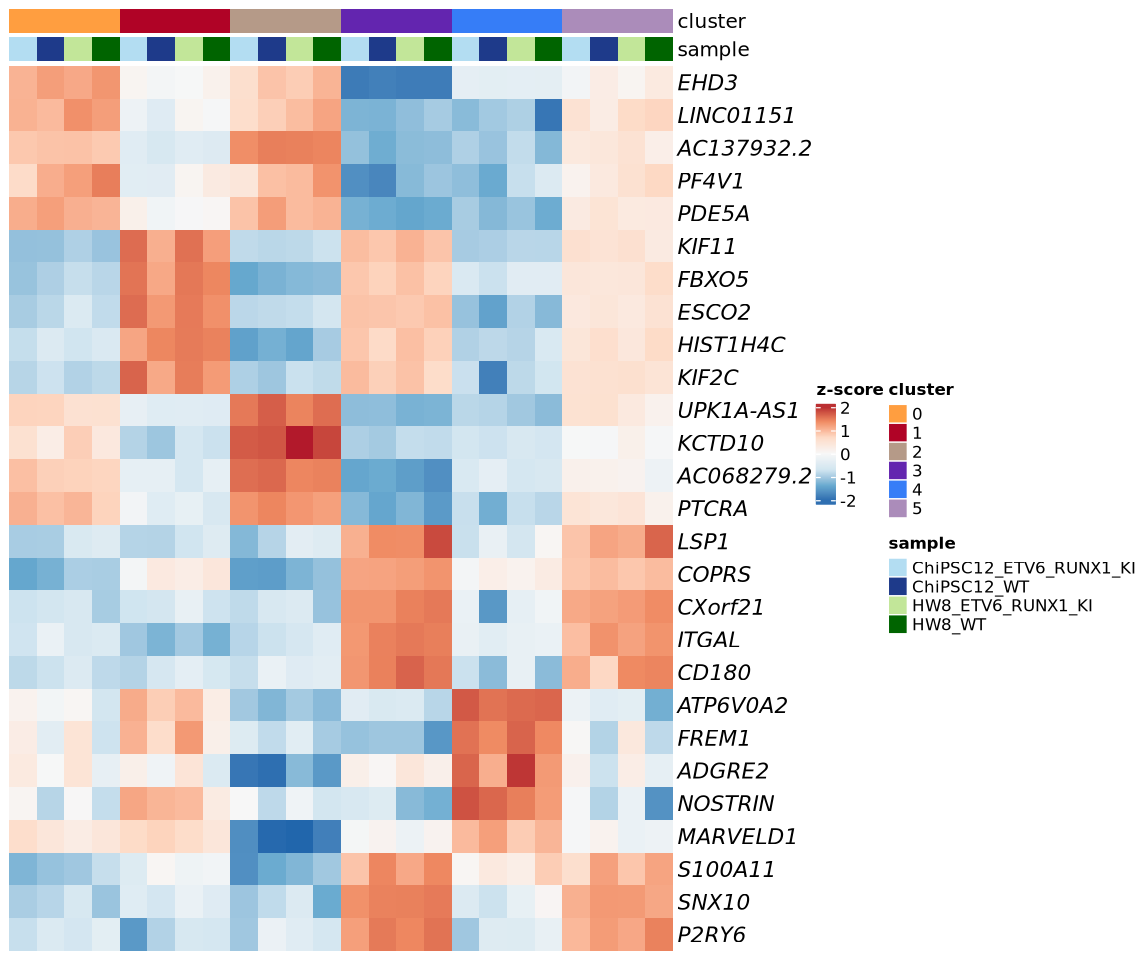

In [69]:
logCPM_sc <- t(scale(t(logcpm_CC))) #scale each row (each gene) to have mean zero and standard deviation one:for ML

ht_scaledlogcpm <- Heatmap(logCPM_sc, 
                           name = "z-score",
                           row_dend_reorder = FALSE,
                           column_dend_reorder = FALSE,
                           cluster_rows = FALSE, 
                           cluster_columns = FALSE,  # Ensure no clustering of columns
                           clustering_distance_column = "pearson",
                           top_annotation = colAnn,
                           column_title_gp = gpar(fontsize = 13, family="Sans"),
                           row_title_gp = gpar(fontsize = 3, family="Sans"),
                           column_names_gp = gpar(fontsize=13, family="Sans",  fontface = "italic"),
                           row_names_gp = gpar(fontsize = 13, family="Sans",  fontface = "italic"), 
                           show_row_dend = TRUE,
                           show_column_dend = FALSE,  # Disable column dendrogram for exact order
                           show_column_names = FALSE,
                           col = colorRamp2(c(-2.1,-1.4,-0.7, 0, 0.7, 1.4, 2.1),
                        #  col = colorRamp2(c(-3,-2,-1, 0, 1, 2, 3),
                                            rev(c("#b2182b","#ef8a62","#fddbc7","#f7f7f7","#d1e5f0","#67a9cf","#2166ac"))
                                           ))

# Plot the heatmap
fig (9.5,8)
draw(ht_scaledlogcpm)

In [70]:
pdf("./figs/topMarkers_Upreg_heatmap.pdf",
         width = 9.5, height = 8)
ht_scaledlogcpm

dev.off()

png 
  2

In [80]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 9.4 (Blue Onyx)

Matrix products: default
BLAS/LAPACK: /research/users/andreha/miniconda3/envs/kitten_and_lemur/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.utf8         LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Helsinki
tzcode source: system (glibc)

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] RColorBrewer_1.1-3    circlize_0.4.16       ComplexHeatmap_2.18.0
 [4] knitr_1.47            scales_1.3.0          edgeR_4.0.16         
 [7] limma_3.58.1          anndata_0